## Problem Statement

In this article, I will be implementing a predictive model on Rain Dataset to predict whether or not it will rain tomorrow in Australia. The Dataset contains about 10 years of daily weather observations of different locations in Australia. 
Dataset Description:

Number of columns: 23
Number of rows: 145460
Number of Independent Columns: 22
Number of Dependent Column: 1

### Import Libraries

In [128]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt

In [129]:
rain = pd.read_csv('weatherAUS.csv')

In [130]:
rain.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


### Understanding dataset

In [131]:
rain.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [132]:
rain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
Date             145460 non-null object
Location         145460 non-null object
MinTemp          143975 non-null float64
MaxTemp          144199 non-null float64
Rainfall         142199 non-null float64
Evaporation      82670 non-null float64
Sunshine         75625 non-null float64
WindGustDir      135134 non-null object
WindGustSpeed    135197 non-null float64
WindDir9am       134894 non-null object
WindDir3pm       141232 non-null object
WindSpeed9am     143693 non-null float64
WindSpeed3pm     142398 non-null float64
Humidity9am      142806 non-null float64
Humidity3pm      140953 non-null float64
Pressure9am      130395 non-null float64
Pressure3pm      130432 non-null float64
Cloud9am         89572 non-null float64
Cloud3pm         86102 non-null float64
Temp9am          143693 non-null float64
Temp3pm          141851 non-null float64
RainToday        142199 non-null obje

In [133]:
rain.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [134]:
rain.isnull().values.any()

True

In [135]:
round(100*(rain.isnull().sum())/len(rain),2)

Date              0.00
Location          0.00
MinTemp           1.02
MaxTemp           0.87
Rainfall          2.24
Evaporation      43.17
Sunshine         48.01
WindGustDir       7.10
WindGustSpeed     7.06
WindDir9am        7.26
WindDir3pm        2.91
WindSpeed9am      1.21
WindSpeed3pm      2.11
Humidity9am       1.82
Humidity3pm       3.10
Pressure9am      10.36
Pressure3pm      10.33
Cloud9am         38.42
Cloud3pm         40.81
Temp9am           1.21
Temp3pm           2.48
RainToday         2.24
RainTomorrow      2.25
dtype: float64

In [136]:
# dropping column havin more than 40% missing value

rain = rain.drop(['Evaporation','Sunshine','Cloud3pm'],axis = 1)

In [137]:
round(100*(rain.isnull().sum())/len(rain),2)

Date              0.00
Location          0.00
MinTemp           1.02
MaxTemp           0.87
Rainfall          2.24
WindGustDir       7.10
WindGustSpeed     7.06
WindDir9am        7.26
WindDir3pm        2.91
WindSpeed9am      1.21
WindSpeed3pm      2.11
Humidity9am       1.82
Humidity3pm       3.10
Pressure9am      10.36
Pressure3pm      10.33
Cloud9am         38.42
Temp9am           1.21
Temp3pm           2.48
RainToday         2.24
RainTomorrow      2.25
dtype: float64

### Treating Variables

In [138]:
rain['Location'].value_counts()

Canberra            3436
Sydney              3344
Darwin              3193
Adelaide            3193
Hobart              3193
Melbourne           3193
Perth               3193
Brisbane            3193
Albany              3040
Bendigo             3040
Townsville          3040
GoldCoast           3040
Albury              3040
AliceSprings        3040
Ballarat            3040
MountGambier        3040
Cairns              3040
MountGinini         3040
Wollongong          3040
Launceston          3040
Tuggeranong         3039
Newcastle           3039
Penrith             3039
SydneyAirport       3009
CoffsHarbour        3009
Williamtown         3009
BadgerysCreek       3009
Mildura             3009
Woomera             3009
Sale                3009
PerthAirport        3009
Portland            3009
Nuriootpa           3009
PearceRAAF          3009
Watsonia            3009
Dartmoor            3009
MelbourneAirport    3009
Moree               3009
WaggaWagga          3009
Cobar               3009


In [139]:
rain['WindGustDir'].value_counts()

W      9915
SE     9418
N      9313
SSE    9216
E      9181
S      9168
WSW    9069
SW     8967
SSW    8736
WNW    8252
NW     8122
ENE    8104
ESE    7372
NE     7133
NNW    6620
NNE    6548
Name: WindGustDir, dtype: int64

In [140]:
rain['WindGustDir']= rain['WindGustDir'].fillna('W')

In [141]:
rain['WindGustDir'].value_counts()

W      20241
SE      9418
N       9313
SSE     9216
E       9181
S       9168
WSW     9069
SW      8967
SSW     8736
WNW     8252
NW      8122
ENE     8104
ESE     7372
NE      7133
NNW     6620
NNE     6548
Name: WindGustDir, dtype: int64

In [142]:
rain['WindDir9am'].value_counts()

N      11758
SE      9287
E       9176
SSE     9112
NW      8749
S       8659
W       8459
SW      8423
NNE     8129
NNW     7980
ENE     7836
NE      7671
ESE     7630
SSW     7587
WNW     7414
WSW     7024
Name: WindDir9am, dtype: int64

In [143]:
rain['WindDir9am']= rain['WindDir9am'].fillna('N')

In [144]:
rain['WindDir9am'].value_counts()

N      22324
SE      9287
E       9176
SSE     9112
NW      8749
S       8659
W       8459
SW      8423
NNE     8129
NNW     7980
ENE     7836
NE      7671
ESE     7630
SSW     7587
WNW     7414
WSW     7024
Name: WindDir9am, dtype: int64

In [145]:
rain['WindDir3pm']= rain['WindDir3pm'].fillna('SE')
rain['WindDir3pm'].value_counts()

SE     15066
W      10110
S       9926
WSW     9518
SSE     9399
SW      9354
N       8890
WNW     8874
NW      8610
ESE     8505
E       8472
NE      8263
SSW     8156
NNW     7870
ENE     7857
NNE     6590
Name: WindDir3pm, dtype: int64

In [146]:
rain['RainToday']= rain['RainToday'].fillna('No')
rain['RainToday'].value_counts()

No     113580
Yes     31880
Name: RainToday, dtype: int64

In [147]:
rain['RainTomorrow']= rain['RainTomorrow'].fillna('No')
rain['RainTomorrow'].value_counts()

No     113583
Yes     31877
Name: RainTomorrow, dtype: int64

In [148]:
round(100*(rain.isnull().sum())/len(rain),2)

Date              0.00
Location          0.00
MinTemp           1.02
MaxTemp           0.87
Rainfall          2.24
WindGustDir       0.00
WindGustSpeed     7.06
WindDir9am        0.00
WindDir3pm        0.00
WindSpeed9am      1.21
WindSpeed3pm      2.11
Humidity9am       1.82
Humidity3pm       3.10
Pressure9am      10.36
Pressure3pm      10.33
Cloud9am         38.42
Temp9am           1.21
Temp3pm           2.48
RainToday         0.00
RainTomorrow      0.00
dtype: float64

In [149]:
rain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 20 columns):
Date             145460 non-null object
Location         145460 non-null object
MinTemp          143975 non-null float64
MaxTemp          144199 non-null float64
Rainfall         142199 non-null float64
WindGustDir      145460 non-null object
WindGustSpeed    135197 non-null float64
WindDir9am       145460 non-null object
WindDir3pm       145460 non-null object
WindSpeed9am     143693 non-null float64
WindSpeed3pm     142398 non-null float64
Humidity9am      142806 non-null float64
Humidity3pm      140953 non-null float64
Pressure9am      130395 non-null float64
Pressure3pm      130432 non-null float64
Cloud9am         89572 non-null float64
Temp9am          143693 non-null float64
Temp3pm          141851 non-null float64
RainToday        145460 non-null object
RainTomorrow     145460 non-null object
dtypes: float64(13), object(7)
memory usage: 22.2+ MB


### Treating Numerical variables with mean

In [150]:
rain['MinTemp']= rain['MinTemp'].replace(np.NaN,rain['MinTemp'].mean())

In [151]:
rain['MaxTemp']= rain['MaxTemp'].replace(np.NaN,rain['MaxTemp'].mean())

In [152]:
rain['Rainfall']= rain['Rainfall'].replace(np.NaN,rain['Rainfall'].mean())
rain['WindGustSpeed']= rain['WindGustSpeed'].replace(np.NaN,rain['WindGustSpeed'].mean())
rain['WindSpeed9am']= rain['WindSpeed9am'].replace(np.NaN,rain['MinTemp'].mean())
rain['WindSpeed3pm']= rain['WindSpeed3pm'].replace(np.NaN,rain['WindSpeed9am'].mean())
rain['Humidity9am']= rain['Humidity9am'].replace(np.NaN,rain['Humidity9am'].mean())
rain['Humidity3pm']= rain['Humidity3pm'].replace(np.NaN,rain['Humidity3pm'].mean())

rain['Pressure9am']= rain['Pressure9am'].replace(np.NaN,rain['Pressure9am'].mean())
rain['Pressure3pm']= rain['Pressure3pm'].replace(np.NaN,rain['Pressure3pm'].mean())
rain['Cloud9am']= rain['Cloud9am'].replace(np.NaN,rain['Cloud9am'].mean())
rain['Temp3pm']= rain['Temp3pm'].replace(np.NaN,rain['Temp3pm'].mean())
rain['Temp9am']= rain['Temp9am'].replace(np.NaN,rain['Temp9am'].mean())


In [153]:
rain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 20 columns):
Date             145460 non-null object
Location         145460 non-null object
MinTemp          145460 non-null float64
MaxTemp          145460 non-null float64
Rainfall         145460 non-null float64
WindGustDir      145460 non-null object
WindGustSpeed    145460 non-null float64
WindDir9am       145460 non-null object
WindDir3pm       145460 non-null object
WindSpeed9am     145460 non-null float64
WindSpeed3pm     145460 non-null float64
Humidity9am      145460 non-null float64
Humidity3pm      145460 non-null float64
Pressure9am      145460 non-null float64
Pressure3pm      145460 non-null float64
Cloud9am         145460 non-null float64
Temp9am          145460 non-null float64
Temp3pm          145460 non-null float64
RainToday        145460 non-null object
RainTomorrow     145460 non-null object
dtypes: float64(13), object(7)
memory usage: 22.2+ MB


In [154]:
# Subset all categorical variables
rain_categorical=rain.select_dtypes(include=['object'])

In [155]:
rain_categorical

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,W,W,WNW,No,No
1,2008-12-02,Albury,WNW,NNW,WSW,No,No
2,2008-12-03,Albury,WSW,W,WSW,No,No
3,2008-12-04,Albury,NE,SE,E,No,No
4,2008-12-05,Albury,W,ENE,NW,No,No
...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,E,SE,ENE,No,No
145456,2017-06-22,Uluru,NNW,SE,N,No,No
145457,2017-06-23,Uluru,N,SE,WNW,No,No
145458,2017-06-24,Uluru,SE,SSE,N,No,No


In [156]:
# List of variables to map

varlist =  ['RainToday','RainTomorrow']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
rain[varlist] = rain[varlist].apply(binary_map)



### Dumifying Categorical Varaiables

In [157]:
# Creating a dummy variable for some of the categorical variables and dropping the first one
dummy1 = pd.get_dummies(rain[['Location','WindGustDir','WindDir9am','WindDir3pm']], drop_first=True)
# Adding the results to master Dataframe
rain = pd.concat([rain, dummy1], axis = 1)

In [158]:
rain.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,2008-12-01,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,...,0,0,0,0,0,0,0,0,1,0
1,2008-12-02,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,...,0,0,0,0,0,0,0,0,0,1
2,2008-12-03,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,...,0,0,0,0,0,0,0,0,0,1
3,2008-12-04,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,...,0,0,0,0,0,0,0,0,0,0
4,2008-12-05,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,...,0,1,0,0,0,0,0,0,0,0


In [159]:
# We have created dummies for the below variables, so we can drop them
rain = rain.drop(['Location','WindGustDir','WindDir9am','WindDir3pm'], 1)

## Model Building 

In [160]:
# putting feature variable to X
X = rain.drop(['RainTomorrow', 'Date'],axis = 1)
X.head()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,...,0,0,0,0,0,0,0,0,1,0
1,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,...,0,0,0,0,0,0,0,0,0,1
2,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,...,0,0,0,0,0,0,0,0,0,1
3,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,...,0,0,0,0,0,0,0,0,0,0
4,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,...,0,1,0,0,0,0,0,0,0,0


In [161]:
# putting feature variable to y
y = rain['RainTomorrow']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: RainTomorrow, dtype: int64

In [162]:
# Split the dataframe into train and test sets
from sklearn.model_selection import train_test_split
np.random.seed(0)
X_train, X_test,y_train,y_test = train_test_split(X,y, train_size=0.7, test_size=0.3, random_state=100)

In [163]:
X_train

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
41250,9.6,24.3,2.360918,33.0,6.0,24.0,57.0,41.0,1020.20000,1018.200000,...,0,0,0,0,0,0,0,0,0,0
124159,21.0,38.9,0.000000,56.0,31.0,35.0,12.0,39.0,1017.64994,1015.255889,...,0,0,1,0,0,0,0,0,0,0
25302,17.4,25.7,2.400000,19.0,7.0,6.0,81.0,59.0,1017.64994,1015.255889,...,0,0,0,0,0,0,0,0,0,0
31583,20.0,26.4,0.000000,43.0,7.0,20.0,73.0,66.0,1009.30000,1003.500000,...,0,0,0,0,0,0,0,0,0,0
113960,11.7,15.6,6.800000,44.0,22.0,20.0,65.0,63.0,1020.20000,1021.900000,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82270,7.7,14.4,6.000000,35.0,9.0,20.0,100.0,81.0,1004.80000,1006.300000,...,0,0,0,0,0,1,0,0,0,0
65615,21.2,27.3,0.000000,70.0,39.0,30.0,26.0,58.0,1008.80000,1012.300000,...,0,0,1,0,0,0,0,0,0,0
77655,5.7,12.1,8.200000,56.0,24.0,35.0,61.0,67.0,1016.40000,1019.200000,...,0,0,0,0,0,0,0,1,0,0
56088,6.1,14.8,0.000000,54.0,26.0,41.0,96.0,55.0,1024.10000,1019.400000,...,0,0,0,0,0,0,0,0,0,0


### Scaling Variables

In [164]:
rain_numerical=rain.select_dtypes(include=['float64'])

In [165]:
rain_numerical.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Cloud9am', 'Temp9am', 'Temp3pm'],
      dtype='object')

In [166]:
from sklearn.preprocessing import StandardScaler

In [167]:
scaler = StandardScaler()

X_train[['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Cloud9am', 'Temp9am', 'Temp3pm']] = scaler.fit_transform(X_train[['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Cloud9am', 'Temp9am', 'Temp3pm']])

X_train.head()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
41250,-0.403707,0.156039,0.000895,-0.535589,-0.905304,0.621418,-0.634165,-0.517490,0.375775,0.438255,...,0,0,0,0,0,0,0,0,0,0
124159,1.380593,2.213508,-0.282337,1.218486,1.915445,1.878992,-3.022954,-0.615261,-0.003091,-0.003373,...,0,0,1,0,0,0,0,0,0,0
25302,0.817130,0.353331,0.005583,-1.603288,-0.792474,-1.436429,0.639856,0.362452,-0.003091,-0.003373,...,0,0,0,0,0,0,0,0,0,0
31583,1.224076,0.451977,-0.282337,0.227052,-0.792474,0.164119,0.215183,0.704652,-1.243651,-1.766804,...,0,0,0,0,0,0,0,0,0,0
113960,-0.075020,-1.069986,0.533437,0.303316,0.899975,0.164119,-0.209491,0.557995,0.375775,0.993270,...,0,0,0,0,0,1,0,0,0,0


In [168]:
import statsmodels.api as sm

In [169]:
# logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:           RainTomorrow   No. Observations:               101822
Model:                            GLM   Df Residuals:                   101714
Model Family:                Binomial   Df Model:                          107
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -36550.
Date:                Sun, 18 Jul 2021   Deviance:                       73100.
Time:                        16:50:43   Pearson chi2:                 1.01e+05
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -1.5012      0.092    -16.296      0.000      -1.682      -1.321
MinTemp                       0.1964      0.032      6.198      0.000       0.134       0.258
MaxTemp                      -0.5213      0.044    -11.806      0.000      -0.608      -0.435
Rainfall                      0.0797      0.011      7.563      0.000       0.059       0.100
WindGustSpeed                 0.7125      0.014     49.331      0.000       0.684       0.741
WindSpeed9am                 -0.0358      0.014     -2.633      0.008      -0.062      -0.009
WindSpeed3pm                 -0.2204      0.013    -16.543      0.000      -0.246      -0.194
Humidity9am                   0.0408      0.020      2.082      0.037       0.002       0.079
Humidity3pm                   1.2674      0.021     59.261      0.000       1.225       1.309
Pressure9am                   0.8937      0.042     21.221      0.000       0.811       0.976
Pressure3pm                  -1.2766      0.042    -30.359      0.000      -1.359      -1.194
Cloud9am                      0.2335      0.012     19.439      0.000       0.210       0.257
Temp9am                       0.2062      0.044      4.644      0.000       0.119       0.293
Temp3pm                       0.1429      0.045      3.175      0.001       0.055       0.231
RainToday                     0.4690      0.025     18.528      0.000       0.419       0.519
Location_Albany              -0.6508      0.090     -7.220      0.000      -0.827      -0.474
Location_Albury              -0.2260      0.096     -2.348      0.019      -0.415      -0.037
Location_AliceSprings        -0.5416      0.123     -4.408      0.000      -0.782      -0.301
Location_BadgerysCreek       -0.5175      0.095     -5.440      0.000      -0.704      -0.331
Location_Ballarat            -1.0578      0.096    -11.036      0.000      -1.246      -0.870
Location_Bendigo             -0.5111      0.099     -5.144      0.000      -0.706      -0.316
Location_Brisbane            -0.3090      0.093     -3.340      0.001      -0.490      -0.128
Location_Cairns              -0.7774      0.094     -8.250      0.000      -0.962      -0.593
Location_Canberra            -0.5890      0.095     -6.183      0.000      -0.776      -0.402
Location_Cobar               -0.3078      0.106     -2.900      0.004      -0.516      -0.100
Location_CoffsHarbour        -0.7435      0.091     -8.170      0.000      -0.922      -0.565
Location_Dartmoor            -0.4359      0.089     -4.903      0.000      -0.610      -0.262
Location_Darwin              -1.2270      0.096    -12.815      0.000      -1.415      -1.039
Location_GoldCoast           -1.1239      0.094    -11.974      0.000      -1.308      -0.940
Location_Hobart              -1.1280      0.092    -12.268      0.000      

### Feature Selectiong Using RFE

In [170]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [171]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg,20)
rfe = rfe.fit(X_train, y_train)

In [172]:
rfe.support_

array([False, False, False,  True, False, False, False,  True,  True,
        True, False, False, False,  True, False, False, False, False,
        True, False, False,  True, False, False, False, False,  True,
        True,  True,  True,  True, False, False, False, False, False,
        True, False, False,  True,  True, False, False, False, False,
       False, False, False,  True, False, False, False,  True, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True,  True,
       False, False, False, False, False, False, False, False])

In [173]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('MinTemp', False, 11),
 ('MaxTemp', False, 10),
 ('Rainfall', False, 69),
 ('WindGustSpeed', True, 1),
 ('WindSpeed9am', False, 75),
 ('WindSpeed3pm', False, 16),
 ('Humidity9am', False, 77),
 ('Humidity3pm', True, 1),
 ('Pressure9am', True, 1),
 ('Pressure3pm', True, 1),
 ('Cloud9am', False, 23),
 ('Temp9am', False, 48),
 ('Temp3pm', False, 29),
 ('RainToday', True, 1),
 ('Location_Albany', False, 9),
 ('Location_Albury', False, 70),
 ('Location_AliceSprings', False, 28),
 ('Location_BadgerysCreek', False, 34),
 ('Location_Ballarat', True, 1),
 ('Location_Bendigo', False, 25),
 ('Location_Brisbane', False, 56),
 ('Location_Cairns', True, 1),
 ('Location_Canberra', False, 21),
 ('Location_Cobar', False, 52),
 ('Location_CoffsHarbour', False, 5),
 ('Location_Dartmoor', False, 36),
 ('Location_Darwin', True, 1),
 ('Location_GoldCoast', True, 1),
 ('Location_Hobart', True, 1),
 ('Location_Katherine', True, 1),
 ('Location_Launceston', True, 1),
 ('Location_Melbourne', False, 8),
 ('Loca

In [174]:
col = X_train.columns[rfe.support_]
col

Index(['WindGustSpeed', 'Humidity3pm', 'Pressure9am', 'Pressure3pm',
       'RainToday', 'Location_Ballarat', 'Location_Cairns', 'Location_Darwin',
       'Location_GoldCoast', 'Location_Hobart', 'Location_Katherine',
       'Location_Launceston', 'Location_MountGinini', 'Location_NorahHead',
       'Location_NorfolkIsland', 'Location_Sale', 'Location_Townsville',
       'Location_Wollongong', 'WindDir3pm_NNW', 'WindDir3pm_NW'],
      dtype='object')

In [175]:
X_train.columns[~rfe.support_]

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'WindSpeed9am', 'WindSpeed3pm',
       'Humidity9am', 'Cloud9am', 'Temp9am', 'Temp3pm', 'Location_Albany',
       'Location_Albury', 'Location_AliceSprings', 'Location_BadgerysCreek',
       'Location_Bendigo', 'Location_Brisbane', 'Location_Canberra',
       'Location_Cobar', 'Location_CoffsHarbour', 'Location_Dartmoor',
       'Location_Melbourne', 'Location_MelbourneAirport', 'Location_Mildura',
       'Location_Moree', 'Location_MountGambier', 'Location_Newcastle',
       'Location_Nhil', 'Location_Nuriootpa', 'Location_PearceRAAF',
       'Location_Penrith', 'Location_Perth', 'Location_PerthAirport',
       'Location_Portland', 'Location_Richmond', 'Location_SalmonGums',
       'Location_Sydney', 'Location_SydneyAirport', 'Location_Tuggeranong',
       'Location_Uluru', 'Location_WaggaWagga', 'Location_Walpole',
       'Location_Watsonia', 'Location_Williamtown', 'Location_Witchcliffe',
       'Location_Woomera', 'WindGustDir_ENE', 'WindGus

### Model Building 2

In [176]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:           RainTomorrow   No. Observations:               101822
Model:                            GLM   Df Residuals:                   101801
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -37523.
Date:                Sun, 18 Jul 2021   Deviance:                       75046.
Time:                        16:53:18   Pearson chi2:                 1.01e+05
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -1.8169      0.014   -133.007      0.000      -1.844      -1.790
WindGustSpeed              0.5299      0.010     52.019      0.000       0.510       0.550
Humidity3pm                1.4243      0.012    113.944      0.000       1.400       1.449
Pressure9am                0.8047      0.034     23.421      0.000       0.737       0.872
Pressure3pm               -1.2431      0.034    -36.313      0.000      -1.310      -1.176
RainToday                  0.6950      0.021     33.219      0.000       0.654       0.736
Location_Ballarat         -0.5633      0.066     -8.564      0.000      -0.692      -0.434
Location_Cairns           -0.3994      0.056     -7.091      0.000      -0.510      -0.289
Location_Darwin           -0.5879      0.061     -9.637      0.000      -0.707      -0.468
Location_GoldCoast        -0.8154      0.061    -13.466      0.000      -0.934      -0.697
Location_Hobart           -0.5260      0.063     -8.380      0.000      -0.649      -0.403
Location_Katherine        -0.7589      0.093     -8.150      0.000      -0.941      -0.576
Location_Launceston       -0.5996      0.069     -8.745      0.000      -0.734      -0.465
Location_MountGinini      -1.3878      0.066    -21.063      0.000      -1.517      -1.259
Location_NorahHead        -0.8598      0.059    -14.506      0.000      -0.976      -0.744
Location_NorfolkIsland    -0.5540      0.057     -9.801      0.000      -0.665      -0.443
Location_Sale             -0.4080      0.063     -6.522      0.000      -0.531      -0.285
Location_Townsville       -0.9994      0.068    -14.760      0.000      -1.132      -0.867
Location_Wollongong       -1.0168      0.061    -16.671      0.000      -1.136      -0.897
WindDir3pm_NNW             0.4548      0.042     10.933      0.000       0.373       0.536
WindDir3pm_NW              0.4359      0.039     11.182      0.000       0.360       0.512
==========================================================================================
"""

In [177]:
# Getting the predicted values on train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

41250     0.043933
124159    0.114482
25302     0.189459
31583     0.623101
113960    0.249970
15856     0.608496
1692      0.120085
33404     0.363706
49891     0.014264
61910     0.132394
dtype: float64

In [178]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.04393294, 0.1144821 , 0.18945909, 0.62310063, 0.2499702 ,
       0.60849611, 0.12008476, 0.36370633, 0.01426442, 0.13239399])

### Creating a dataframe with the actual convert flag and the predicted probabilities

In [179]:
y_train_pred_final = pd.DataFrame({'Converted': y_train.values, 'convert_prob': y_train_pred})
y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head()

,Converted,convert_prob,CustID
0,0,0.043933,41250
1,0,0.114482,124159
2,0,0.189459,25302
3,1,0.623101,31583
4,0,0.249970,113960


### Creating new column 'predicted' with 1 if Convert_Prob > 0.5 else 0

In [180]:
y_train_pred_final['predicted'] = y_train_pred_final.convert_prob.map(lambda x:1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,convert_prob,CustID,predicted
0,0,0.043933,41250,0
1,0,0.114482,124159,0
2,0,0.189459,25302,0
3,1,0.623101,31583,1
4,0,0.249970,113960,0


In [181]:
from sklearn import metrics

#Confusion Metrics
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted)
print(confusion)

[[75495  4049]
 [11902 10376]]


In [182]:
# Accuracy accuracy = correctly predicted labels/ total no of labels
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8433442674471135


### Checking VIF

In [183]:
# check for the VIF Variable
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [184]:
# Create a dataframe thdt will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,features,VIF
2,Pressure9am,15.64
3,Pressure3pm,15.29
0,WindGustSpeed,1.29
4,RainToday,1.28
1,Humidity3pm,1.25
18,WindDir3pm_NNW,1.10
11,Location_Launceston,1.08
19,WindDir3pm_NW,1.07
7,Location_Darwin,1.06
9,Location_Hobart,1.03


In [185]:
col = col.drop('Pressure9am')
col

Index(['WindGustSpeed', 'Humidity3pm', 'Pressure3pm', 'RainToday',
       'Location_Ballarat', 'Location_Cairns', 'Location_Darwin',
       'Location_GoldCoast', 'Location_Hobart', 'Location_Katherine',
       'Location_Launceston', 'Location_MountGinini', 'Location_NorahHead',
       'Location_NorfolkIsland', 'Location_Sale', 'Location_Townsville',
       'Location_Wollongong', 'WindDir3pm_NNW', 'WindDir3pm_NW'],
      dtype='object')

In [186]:
### Model Building 3

In [187]:
X_train_sm1 = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm1, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:           RainTomorrow   No. Observations:               101822
Model:                            GLM   Df Residuals:                   101802
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -37803.
Date:                Sun, 18 Jul 2021   Deviance:                       75606.
Time:                        16:53:28   Pearson chi2:                 1.01e+05
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -1.8166      0.014   -133.119      0.000      -1.843      -1.790
WindGustSpeed              0.4763      0.010     48.367      0.000       0.457       0.496
Humidity3pm                1.3758      0.012    112.675      0.000       1.352       1.400
Pressure3pm               -0.4845      0.011    -46.023      0.000      -0.505      -0.464
RainToday                  0.5834      0.020     28.836      0.000       0.544       0.623
Location_Ballarat         -0.5953      0.065     -9.140      0.000      -0.723      -0.468
Location_Cairns           -0.2855      0.056     -5.123      0.000      -0.395      -0.176
Location_Darwin           -0.4838      0.060     -8.002      0.000      -0.602      -0.365
Location_GoldCoast        -0.6892      0.060    -11.553      0.000      -0.806      -0.572
Location_Hobart           -0.6182      0.062     -9.920      0.000      -0.740      -0.496
Location_Katherine        -0.5534      0.092     -6.004      0.000      -0.734      -0.373
Location_Launceston       -0.6459      0.068     -9.547      0.000      -0.779      -0.513
Location_MountGinini      -1.2571      0.064    -19.549      0.000      -1.383      -1.131
Location_NorahHead        -0.7720      0.059    -13.191      0.000      -0.887      -0.657
Location_NorfolkIsland    -0.5379      0.056     -9.641      0.000      -0.647      -0.429
Location_Sale             -0.4341      0.063     -6.931      0.000      -0.557      -0.311
Location_Townsville       -0.8793      0.067    -13.093      0.000      -1.011      -0.748
Location_Wollongong       -0.9465      0.060    -15.700      0.000      -1.065      -0.828
WindDir3pm_NNW             0.5785      0.041     14.092      0.000       0.498       0.659
WindDir3pm_NW              0.5115      0.039     13.218      0.000       0.436       0.587
==========================================================================================
"""

In [188]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Pressure3pm,1.27
0,WindGustSpeed,1.24
3,RainToday,1.22
1,Humidity3pm,1.20
17,WindDir3pm_NNW,1.08
10,Location_Launceston,1.08
18,WindDir3pm_NW,1.07
6,Location_Darwin,1.05
8,Location_Hobart,1.03
5,Location_Cairns,1.03


In [189]:
y_train_pred = res.predict(X_train_sm1).values.reshape(-1)

In [190]:
y_train_pred[:10]

array([0.0476073 , 0.11095741, 0.18292557, 0.52922381, 0.30953309,
       0.5686516 , 0.24916171, 0.34890053, 0.01263439, 0.13990486])

In [191]:
y_train_pred_final['convert_prob'] = y_train_pred

In [192]:
# Creating new column 'predicted' with 1 if Convert_prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.convert_prob.map(lambda x: 1 if x > 0.5 else 0)

In [193]:
y_train_pred_final.head()

,Converted,convert_prob,CustID,predicted
0,0,0.047607,41250,0
1,0,0.110957,124159,0
2,0,0.182926,25302,0
3,1,0.529224,31583,1
4,0,0.309533,113960,0


In [194]:
# Let's take a look at the confusion matrix again 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[75507,  4037],
       [11988, 10290]], dtype=int64)

In [195]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.8426175089862702

## Metrics beyond simply accuracy

In [196]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [197]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.46189065445731214

In [198]:
# Let us calculate specificity
TN / float(TN+FP)

0.9492482148244996

In [199]:
# Calculate false postive rate - predicting convert when customer does not have converted
print(FP/ float(TN+FP))

0.05075178517550035


In [200]:
# positive predictive value 
print (TP / float(TP+FP))

0.7182243316814406


In [201]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8629864563689353


## Plotting the ROC Curve

In [202]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [203]:
fpr,tpr,threshold=metrics.roc_curve(y_train_pred_final.Converted,y_train_pred_final.convert_prob, drop_intermediate=False)

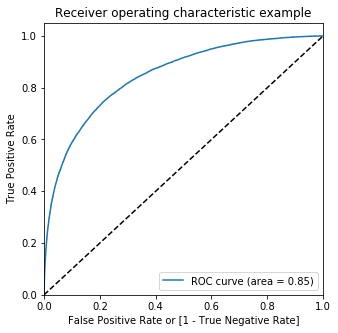

In [204]:
draw_roc(y_train_pred_final.Converted,y_train_pred_final.convert_prob)

## Finding optimal cutoff point

In [205]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range (10)]
for i in numbers:
    y_train_pred_final[i] = y_train_pred_final.convert_prob.map(lambda x:1 if x>i else 0)
y_train_pred_final.head()

,Converted,convert_prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.047607,41250,0,1,0,0,0,0,0,0,0,0,0
1,0,0.110957,124159,0,1,1,0,0,0,0,0,0,0,0
2,0,0.182926,25302,0,1,1,0,0,0,0,0,0,0,0
3,1,0.529224,31583,1,1,1,1,1,1,1,0,0,0,0
4,0,0.309533,113960,0,1,1,1,1,0,0,0,0,0,0


In [206]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame(columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.218794  1.000000  0.000000
0.1   0.1  0.617322  0.900485  0.538017
0.2   0.2  0.761338  0.772107  0.758322
0.3   0.3  0.814343  0.656387  0.858581
0.4   0.4  0.836833  0.556917  0.915229
0.5   0.5  0.842618  0.461891  0.949248
0.6   0.6  0.838836  0.365966  0.971274
0.7   0.7  0.828328  0.268696  0.985065
0.8   0.8  0.813027  0.167385  0.993852
0.9   0.9  0.794386  0.065176  0.998617


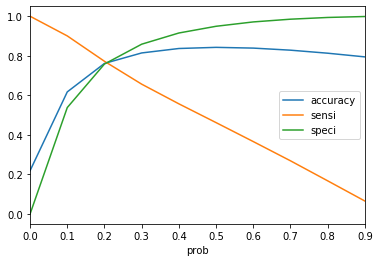

In [207]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [208]:
y_train_pred_final['final_predicted'] = y_train_pred_final.convert_prob.map( lambda x: 1 if x > 0.2 else 0)

y_train_pred_final.head()

,Converted,convert_prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.047607,41250,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.110957,124159,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.182926,25302,0,1,1,0,0,0,0,0,0,0,0,0
3,1,0.529224,31583,1,1,1,1,1,1,1,0,0,0,0,1
4,0,0.309533,113960,0,1,1,1,1,0,0,0,0,0,0,1


In [209]:
# Now let us calculate the lead score

y_train_pred_final['rain_tomorrow'] = y_train_pred_final.convert_prob.map(lambda x: round(x*100))
y_train_pred_final.head(20)

,Converted,convert_prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,rain_tomorrow
0,0,0.047607,41250,0,1,0,0,0,0,0,0,0,0,0,0,5
1,0,0.110957,124159,0,1,1,0,0,0,0,0,0,0,0,0,11
2,0,0.182926,25302,0,1,1,0,0,0,0,0,0,0,0,0,18
3,1,0.529224,31583,1,1,1,1,1,1,1,0,0,0,0,1,53
4,0,0.309533,113960,0,1,1,1,1,0,0,0,0,0,0,1,31
5,0,0.568652,15856,1,1,1,1,1,1,1,0,0,0,0,1,57
6,0,0.249162,1692,0,1,1,1,0,0,0,0,0,0,0,1,25
7,1,0.348901,33404,0,1,1,1,1,0,0,0,0,0,0,1,35
8,0,0.012634,49891,0,1,0,0,0,0,0,0,0,0,0,0,1
9,0,0.139905,61910,0,1,1,0,0,0,0,0,0,0,0,0,14


In [210]:
# checking if 80% cases are correctly predicted based on the converted column.

# get the total of final predicted conversion / non conversion counts from the actual converted rates

checking_df = y_train_pred_final.loc[y_train_pred_final['Converted']==1,['Converted','final_predicted']]
checking_df['final_predicted'].value_counts()

1    17201
0     5077
Name: final_predicted, dtype: int64

In [211]:
# check the precentage of final_predicted conversions

17201/float(17201+5077)

0.7721070114013825

In [212]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7613384140951858

In [213]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[60320, 19224],
       [ 5077, 17201]], dtype=int64)

In [214]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [215]:
# Let's see the sensitivity of our logistic regression model
TP/float(TP+FN)

0.7721070114013825

In [216]:
# Let us calculate specificity
TN / float(TN+FP)

0.7583224378960073

In [217]:
# Calculate false postive rate - predicting convert when customer does not have converted
print(FP/ float(TN+FP))

0.24167756210399277


In [218]:
# Positive predictive value 
print (TP / float(TP+FP))

0.4722306108442004


In [219]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9223664694099117


## Precision and Recall

In [220]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[75507,  4037],
       [11988, 10290]], dtype=int64)

In [221]:
#PRECISION

confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7182243316814406

In [222]:
# RECALL

confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.46189065445731214

In [223]:
from sklearn.metrics import precision_score, recall_score

In [224]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.7182243316814406

In [225]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.46189065445731214

## Precision and Recall Tradoff

In [226]:
from sklearn.metrics import precision_recall_curve

In [227]:
y_train_pred_final.Converted,y_train_pred_final.predicted

(0         0
 1         0
 2         0
 3         1
 4         0
          ..
 101817    1
 101818    0
 101819    0
 101820    0
 101821    0
 Name: Converted, Length: 101822, dtype: int64, 0         0
 1         0
 2         0
 3         1
 4         0
          ..
 101817    1
 101818    0
 101819    1
 101820    0
 101821    0
 Name: predicted, Length: 101822, dtype: int64)

In [228]:
p,r,thresholds = precision_recall_curve(y_train_pred_final.Converted,y_train_pred_final.convert_prob)

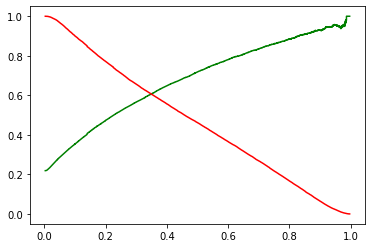

In [229]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

## Making prediction on Test set

In [230]:
X_test.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm',
       ...
       'WindDir3pm_NNW', 'WindDir3pm_NW', 'WindDir3pm_S', 'WindDir3pm_SE',
       'WindDir3pm_SSE', 'WindDir3pm_SSW', 'WindDir3pm_SW', 'WindDir3pm_W',
       'WindDir3pm_WNW', 'WindDir3pm_WSW'],
      dtype='object', length=107)

In [231]:
X_test[['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Cloud9am', 'Temp9am', 'Temp3pm']] = scaler.fit_transform(X_test[['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Cloud9am', 'Temp9am', 'Temp3pm']])

In [232]:
X_test = X_test[col]
X_test.head()

,WindGustSpeed,Humidity3pm,Pressure3pm,RainToday,Location_Ballarat,Location_Cairns,Location_Darwin,Location_GoldCoast,Location_Hobart,Location_Katherine,Location_Launceston,Location_MountGinini,Location_NorahHead,Location_NorfolkIsland,Location_Sale,Location_Townsville,Location_Wollongong,WindDir3pm_NNW,WindDir3pm_NW
81285,2.279627,1.100624,-0.556259,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
119470,-0.233339,-0.069754,0.840614,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
131117,2.279627,0.417904,-0.000514,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
106459,-0.537941,0.369138,0.735473,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
52818,1.213520,-0.313583,0.007881,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [233]:
X_test_sm = sm.add_constant(X_test)

In [234]:
y_test_pred = res.predict(X_test_sm)

In [235]:
y_test_pred[:10]

81285     0.837041
119470    0.080841
131117    0.452558
106459    0.127716
52818     0.050651
82965     0.085446
81150     0.442887
114779    0.023109
48190     0.047899
130365    0.160697
dtype: float64

In [236]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [237]:
# Let's see the head
y_pred_1.head()

,0
81285,0.837041
119470,0.080841
131117,0.452558
106459,0.127716
52818,0.050651


In [250]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [251]:
# Putting CustID to index
y_test_df['CustID'] = y_test_df.index

In [252]:
# Removing index for both dataframes to append them side by side 
#  reset_index() function is used to generate a new DataFrame or Series with the index reset. 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [253]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [254]:
y_pred_final.head()

,RainTomorrow,CustID,0
0,1,81285,0.837041
1,0,119470,0.080841
2,0,131117,0.452558
3,0,106459,0.127716
4,0,52818,0.050651


In [255]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'convert_prob'})

In [256]:
# Let's see the head of y_pred_final
y_pred_final.head()

,RainTomorrow,CustID,convert_prob
0,1,81285,0.837041
1,0,119470,0.080841
2,0,131117,0.452558
3,0,106459,0.127716
4,0,52818,0.050651


In [257]:
y_pred_final = y_pred_final[["CustID", "RainTomorrow", "convert_prob"]]

In [258]:
y_pred_final.columns

Index(['CustID', 'RainTomorrow', 'convert_prob'], dtype='object')

In [259]:
y_pred_final['final_predicted'] = y_pred_final.convert_prob.map(lambda x: 1 if x > 0.2 else 0)

In [260]:
y_pred_final.head()

,CustID,RainTomorrow,convert_prob,final_predicted
0,81285,1,0.837041,1
1,119470,0,0.080841,0
2,131117,0,0.452558,1
3,106459,0,0.127716,0
4,52818,0,0.050651,0


In [261]:
# Now let us calculate the lead score

y_pred_final['lead_score'] = y_pred_final.convert_prob.map(lambda x: round(x*100))
y_pred_final.head(20)

,CustID,RainTomorrow,convert_prob,final_predicted,lead_score
0,81285,1,0.837041,1,84
1,119470,0,0.080841,0,8
2,131117,0,0.452558,1,45
3,106459,0,0.127716,0,13
4,52818,0,0.050651,0,5
5,82965,0,0.085446,0,9
6,81150,0,0.442887,1,44
7,114779,0,0.023109,0,2
8,48190,0,0.047899,0,5
9,130365,1,0.160697,0,16


In [264]:
# checking if cases are correctly predicted based on the converted column.

# get the total of final predicted conversion or non conversion counts from the actual converted rates

checking_test_df = y_pred_final.loc[y_pred_final['RainTomorrow']==1,['RainTomorrow','final_predicted']]
checking_test_df['final_predicted'].value_counts()

1    7455
0    2144
Name: final_predicted, dtype: int64

In [265]:
7455/float(7455+2144)

0.7766434003542035

In [266]:
#Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.RainTomorrow, y_pred_final.final_predicted)

0.7627068151610982

In [267]:
confusion2 = metrics.confusion_matrix(y_pred_final.RainTomorrow, y_pred_final.final_predicted )
confusion2

array([[25828,  8211],
       [ 2144,  7455]], dtype=int64)

In [268]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [269]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7766434003542035

In [270]:
# Let us calculate specificity
TN / float(TN+FP)

0.7587766973177825

## Making prediction on Parent Data

In [271]:
X[['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Cloud9am', 'Temp9am', 'Temp3pm']] = scaler.fit_transform(X[['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Cloud9am', 'Temp9am', 'Temp3pm']])

In [272]:
X = X[col]
X.head()

,WindGustSpeed,Humidity3pm,Pressure3pm,RainToday,Location_Ballarat,Location_Cairns,Location_Darwin,Location_GoldCoast,Location_Hobart,Location_Katherine,Location_Launceston,Location_MountGinini,Location_NorahHead,Location_NorfolkIsland,Location_Sale,Location_Townsville,Location_Wollongong,WindDir3pm_NNW,WindDir3pm_NW
0,0.302234,-1.442965,-1.223882,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0.302234,-1.296417,-1.118839,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0.454694,-1.052171,-0.983784,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,-1.222364,-1.736061,-0.368534,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0.073544,-0.905623,-1.388949,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [273]:
X_sm = sm.add_constant(X)

In [274]:
y_pred = res.predict(X_sm)

In [275]:
y_pred[:10]

0    0.044580
1    0.051459
2    0.071034
3    0.009866
4    0.136695
5    0.080297
6    0.041944
7    0.021639
8    0.134083
9    0.067567
dtype: float64

In [276]:
# Converting y_pred to a dataframe which is an array
y_pred_2 = pd.DataFrame(y_pred)

In [277]:
# Let's see the head
y_pred_2.head()

,0
0,0.044580
1,0.051459
2,0.071034
3,0.009866
4,0.136695


In [278]:
# Converting y_test to dataframe
y_df = pd.DataFrame(y)

In [279]:
# Putting CustID to index
y_df['CustID'] = y_df.index

In [280]:
# Removing index for both dataframes to append them side by side 
y_pred_2.reset_index(drop=True, inplace=True)
y_df.reset_index(drop=True, inplace=True)

In [281]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_df, y_pred_2],axis=1)

In [282]:
y_pred_final.head()

,RainTomorrow,CustID,0
0,0,0,0.044580
1,0,1,0.051459
2,0,2,0.071034
3,0,3,0.009866
4,0,4,0.136695


In [283]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'convert_prob'})

In [284]:
# Let's see the head of y_pred_final
y_pred_final.head()

,RainTomorrow,CustID,convert_prob
0,0,0,0.044580
1,0,1,0.051459
2,0,2,0.071034
3,0,3,0.009866
4,0,4,0.136695


In [285]:
y_pred_final = y_pred_final[["CustID", "RainTomorrow", "convert_prob"]]

In [286]:
# Let's see the head of y_pred_final
y_pred_final.head()

,CustID,RainTomorrow,convert_prob
0,0,0,0.044580
1,1,0,0.051459
2,2,0,0.071034
3,3,0,0.009866
4,4,0,0.136695


In [287]:
y_pred_final['final_predicted'] = y_pred_final.convert_prob.map(lambda x: 1 if x > 0.2 else 0)

In [288]:
y_pred_final.head()

,CustID,RainTomorrow,convert_prob,final_predicted
0,0,0,0.044580,0
1,1,0,0.051459,0
2,2,0,0.071034,0
3,3,0,0.009866,0
4,4,0,0.136695,0


In [289]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.RainTomorrow, y_pred_final.final_predicted)

0.7617764333837481

In [290]:
confusion2 = metrics.confusion_matrix(y_pred_final.RainTomorrow, y_pred_final.final_predicted )
confusion2

array([[86156, 27427],
       [ 7225, 24652]], dtype=int64)

In [291]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [292]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7733475546632368

In [293]:
# Let us calculate specificity
TN / float(TN+FP)

0.7585290052208518